In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# deep learning stack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img 

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from tensorflow.keras import backend as K

K.clear_session()




2022-08-28 19:01:06.013529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-28 19:01:06.013569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


First we will use a simple black tshirt and see how 3 models, resnet50, and vgg16 and mobilenetV2 do at predicting it.

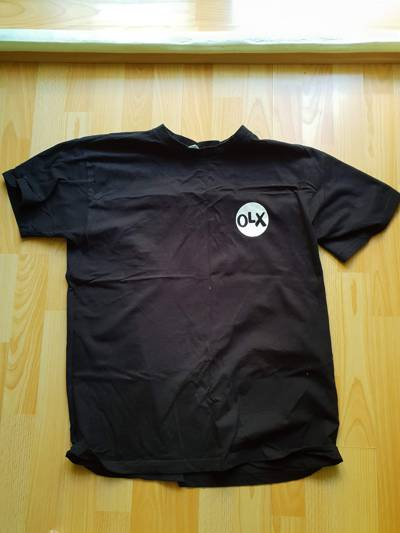

In [2]:
path = '../week9/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

First lets import the models and set up funtions to resize and preprocess the image

In [3]:
# vgg16
from tensorflow.keras.applications.vgg16 import VGG16

# resnet50
from tensorflow.keras.applications.resnet50 import ResNet50

# mobilenetV2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


In [4]:
def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

In [5]:
# vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_pp
# resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_pp
# mobilenetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as MobileNetV2



PP_INPUT = {'vgg16': vgg16_pp,
            'resnet50': resnet50_pp,
            'mobilenetv2': MobileNetV2
            }
 
def image_preprocessing(resized_image,model):
    """
    This function preprocesses the input image for ResNet50
    """
    X = image.img_to_array(resized_image)
    X = PP_INPUT[model](X)
    X = np.expand_dims(X, axis=0)
    return X

In [6]:
from tensorflow.keras.applications.resnet50 import decode_predictions

def image_class_prediction(model, preprocessed_image):
    """
    This function spits out the top-5 predictions for a given model with a proprocessed image
    """
    model_prediction = model.predict(preprocessed_image,verbose=0)
    decoded_prediction = decode_predictions(model_prediction,top=5)[0]
    data = {'image_class': [_[1] for _ in decoded_prediction],
            'probability': [_[2] for _ in decoded_prediction]
           }
    df = pd.DataFrame(data=data)
    return df

In [7]:
vgg16_model = VGG16(
    include_top=True,
    weights='imagenet',
    classes=1000
)
vgg16_model.summary()

2022-08-28 19:01:11.228132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-28 19:01:11.228195: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-28 19:01:11.228234: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nathan-Lenovo): /proc/driver/nvidia/version does not exist
2022-08-28 19:01:11.228815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
resnet50_model = ResNet50(
    include_top=True,
    weights="imagenet",
    classes=1000
)
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

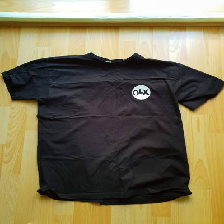

In [10]:
# resize and show image
resized_image = image_resizing(fullname)
resized_image

In [11]:
# preprocess an image
preprocessed_img1 = image_preprocessing(resized_image,'resnet50')

# class prediction
image_class_prediction(resnet50_model, preprocessed_img1)

,image_class,probability
0,jersey,0.824460
1,sweatshirt,0.087614
2,sleeping_bag,0.025300
3,bulletproof_vest,0.007101
4,maillot,0.005955


In [12]:
# preprocess an image
preprocessed_img2 = image_preprocessing(resized_image,'vgg16')

# class prediction
image_class_prediction(vgg16_model, preprocessed_img2)

,image_class,probability
0,sweatshirt,0.329365
1,jersey,0.313599
2,sleeping_bag,0.213549
3,backpack,0.034306
4,bulletproof_vest,0.019927


'resnet50' is 'apparently' much more certain than 'vgg16' but both are not identifying the T-shirt correctly.
First lets try with some other images then we can move on and  see if we can train it a bit more to get a better result.

To speed things up lets build a function for this:

In [36]:
from tensorflow.keras import backend as K

K.clear_session()

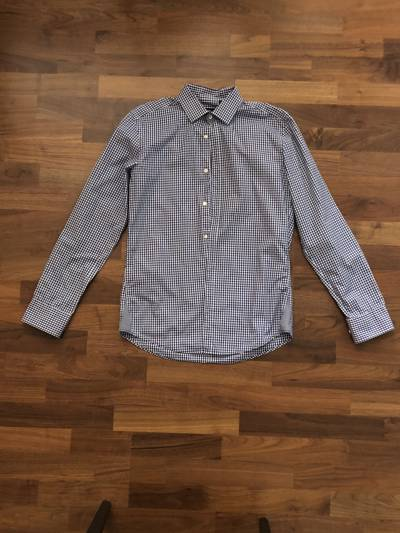

In [14]:
#path = '../week9/train/t-shirt'
#name = '0d24634d-4daa-41bc-8acf-61b8382e0419.jpg'
#fullname = path + '/' + name
fullname =('/home/nathan/Random_Rose/spiced_projects/week9/train/shirt/e5f6e679-cc48-4ea8-920e-670aa21ca0e0.jpg')
load_img(fullname)

In [15]:
def predictor_resnet50(item):
    resized_image = image_resizing(item)
    preprocessed_img1 = image_preprocessing(resized_image,'resnet50')
    final = image_class_prediction(resnet50_model, preprocessed_img1)

    return final

In [16]:
def predictor_vgg16(item):
    resized_image = image_resizing(item)
    preprocessed_img2 = image_preprocessing(resized_image,'vgg16')
    final = image_class_prediction(vgg16_model, preprocessed_img2)

    return final

In [ ]:
def predictor_mobilenet(item):
    resized_image = image_resizing(item)
    preprocessed_img1 = image_preprocessing(resized_image,'mobilenetv2')
    final = image_class_prediction(mobileNetV2_model, preprocessed_img1)

    return final

In [17]:
predictor_resnet50(fullname)

,image_class,probability
0,pajama,0.387605
1,bonnet,0.120853
2,overskirt,0.064097
3,apron,0.057223
4,cardigan,0.039322


In [18]:
predictor_vgg16(fullname)

,image_class,probability
0,wool,0.205548
1,cardigan,0.164258
2,chain_mail,0.114602
3,mitten,0.110376
4,bonnet,0.101037


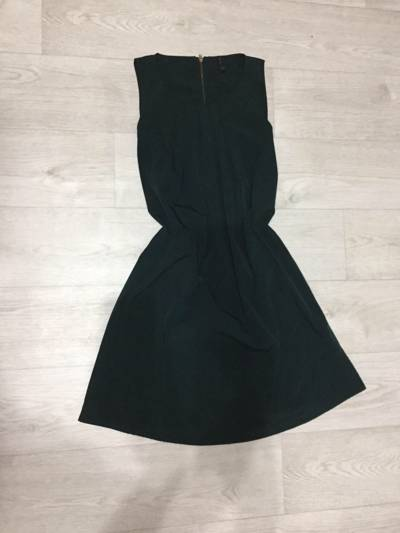

In [29]:
shoes=('/home/nathan/Random_Rose/spiced_projects/week9/train/shoes/1e3ce182-d152-4476-8b6c-be3be197debf.jpg') # pink slippers
shorts=('/home/nathan/Random_Rose/spiced_projects/week9/train/shorts/00f4bb77-5cbd-4c81-98b5-42647b8d0c64.jpg') # swiming trunks
skirt=('/home/nathan/Random_Rose/spiced_projects/week9/train/skirt/6f7e039f-85a2-47dd-9cc2-b2cbd64367a5.jpg') # short black skirt
hat=('/home/nathan/Random_Rose/spiced_projects/week9/train/hat/1febd681-151b-4c8c-baff-ddc52d16c6c0.jpg') #red reebok cap
dress=('/home/nathan/Random_Rose/spiced_projects/week9/train/dress/2b66fdb1-33dd-445f-a422-b17fbe543483.jpg') # black sleeveless dress
load_img(dress)

In [32]:
predictor_resnet50(skirt)


,image_class,probability
0,bath_towel,0.306777
1,miniskirt,0.300997
2,purse,0.098310
3,velvet,0.059030
4,shower_curtain,0.030325


In [33]:
predictor_vgg16(skirt)

,image_class,probability
0,swimming_trunks,0.175427
1,broom,0.149027
2,miniskirt,0.108776
3,swab,0.102277
4,purse,0.091532


In [37]:
predictor_resnet50(hat)

,image_class,probability
0,soap_dispenser,0.225385
1,bucket,0.142538
2,bathing_cap,0.067645
3,knee_pad,0.064578
4,purse,0.050680


In [38]:
predictor_vgg16(hat)

,image_class,probability
0,bucket,0.489544
1,ashcan,0.272381
2,hamper,0.057742
3,shopping_basket,0.047421
4,candle,0.019479


After multiple different images tested as shirts and tshirts and all incorrect its time to see if we can do better.

Train data

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "../week9/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation data

In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "../week9/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)